# Backward Elimination
One by one features are dropped from the model

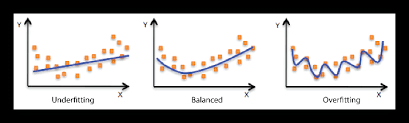

# If autocompletion is not working apply following stepst
1. Open command pallete with ctrl + shift + p
2. Write Restart and select Python: Restar Language Server

# Two Pipeline process
1. Create pipeline for feature selection process (Categorical Features Use OrdinalEncoding)
2. Create final pipeline on Selected features (Categorical Features use one hot encoder)

In [1]:
from warnings import filterwarnings

filterwarnings("ignore")

# Step 1 - Data Ingestion

In [2]:
import pandas as pd 

df = pd.read_csv("Cars93.csv", na_values = ["", "NA"], keep_default_na=False)
df.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


# Step 2 - Perform Basic Data quality checks

In [3]:
# Check duplicates
df.duplicated().sum()

np.int64(1)

In [4]:
df.shape

(94, 28)

In [5]:
# Drop duplicates
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.shape

(93, 28)

In [6]:
# Check missing values in data
m = df.isna().sum()
m

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

In [7]:
m[m > 0]

AirBags            4
Rear.seat.room     2
Luggage.room      11
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             89 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

# Step 3 - Seperate X and Y(Weight)
Remove high cardinality features from X

In [9]:
df["id"].nunique()

93

In [10]:
df["Type"].nunique()

6

In [11]:
X = df.drop(columns=["id", "Weight"])
Y = df["Weight"]

In [12]:
X.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,13.2,5,177,102,68,37,26.5,11.0,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,18.0,5,195,115,71,38,30.0,15.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,16.9,5,180,102,67,37,28.0,14.0,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,21.1,6,193,106,70,37,31.0,17.0,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,21.1,4,186,109,69,39,27.0,13.0,non-USA,BMW 535i


In [13]:
X.nunique()

Manufacturer          32
Model                 93
Type                   6
Min.Price             79
Price                 81
Max.Price             79
MPG.city              21
MPG.highway           22
AirBags                3
DriveTrain             3
Cylinders              6
EngineSize            26
Horsepower            57
RPM                   24
Rev.per.mile          78
Man.trans.avail        2
Fuel.tank.capacity    38
Passengers             6
Length                51
Wheelbase             27
Width                 16
Turn.circle           14
Rear.seat.room        24
Luggage.room          16
Origin                 2
Make                  93
dtype: int64

In [14]:
a = X.select_dtypes(include="object").nunique()
a

Manufacturer       32
Model              93
Type                6
AirBags             3
DriveTrain          3
Cylinders           6
Man.trans.avail     2
Origin              2
Make               93
dtype: int64

In [15]:
cardinality  = a / len(X)
cardinality

Manufacturer       0.344086
Model              1.000000
Type               0.064516
AirBags            0.032258
DriveTrain         0.032258
Cylinders          0.064516
Man.trans.avail    0.021505
Origin             0.021505
Make               1.000000
dtype: float64

In [16]:
threshold = 0.9
high_cardinality = cardinality[cardinality >= threshold]
high_cardinality

Model    1.0
Make     1.0
dtype: float64

In [17]:
high_cardinality.index.tolist()

['Model', 'Make']

In [18]:
def get_high_cardinality(X: pd.DataFrame, threshold: float = 0.9) -> list[str]:
    unique_count = X.select_dtypes(include="object").nunique()
    cardinality = unique_count / len(X)
    print(cardinality)
    high_cardinality = cardinality[cardinality >=  threshold]
    return high_cardinality.index.tolist()

In [19]:
high_card_cols = get_high_cardinality(X)
print(high_card_cols)

Manufacturer       0.344086
Model              1.000000
Type               0.064516
AirBags            0.032258
DriveTrain         0.032258
Cylinders          0.064516
Man.trans.avail    0.021505
Origin             0.021505
Make               1.000000
dtype: float64
['Model', 'Make']


# Remove high cardinality columns

In [20]:
X = X.drop(columns=high_card_cols)
X.head()

,Manufacturer,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,...,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin
0,Acura,Small,12.9,15.9,18.8,25,31,None,Front,4,...,Yes,13.2,5,177,102,68,37,26.5,11.0,non-USA
1,Acura,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,...,Yes,18.0,5,195,115,71,38,30.0,15.0,non-USA
2,Audi,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,...,Yes,16.9,5,180,102,67,37,28.0,14.0,non-USA
3,Audi,Midsize,30.8,37.7,44.6,19,26,NaN,Front,6,...,Yes,21.1,6,193,106,70,37,31.0,17.0,non-USA
4,BMW,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,...,Yes,21.1,4,186,109,69,39,27.0,13.0,non-USA


In [21]:
X.columns

Index(['Manufacturer', 'Type', 'Min.Price', 'Price', 'Max.Price', 'MPG.city',
       'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders', 'EngineSize',
       'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Origin'],
      dtype='object')

# Step 4 - Apply preprocesssing for feature selection
Categorical Features use OrdinalEncoder

In [22]:
cat = list(X.columns[X.dtypes == "object"])
cat

['Manufacturer',
 'Type',
 'AirBags',
 'DriveTrain',
 'Cylinders',
 'Man.trans.avail',
 'Origin']

In [23]:
con = list(X.columns[X.dtypes != "object"])
con

['Min.Price',
 'Price',
 'Max.Price',
 'MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Rear.seat.room',
 'Luggage.room']

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [25]:
num_pipe1 = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

In [26]:
cat_pipe1 = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder()
)

In [27]:
pre1 = ColumnTransformer(
    [
        ("num", num_pipe1, con),
        ("cat", cat_pipe1, cat)
    ]
).set_output(transform="pandas")

In [28]:
X_pre = pre1.fit_transform(X)
X_pre.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,num__Turn.circle,num__Rear.seat.room,num__Luggage.room,cat__Manufacturer,cat__Type,cat__AirBags,cat__DriveTrain,cat__Cylinders,cat__Man.trans.avail,cat__Origin
0,-0.485787,-0.375720,-0.282465,0.471312,0.360925,-0.841022,-0.073484,1.717489,1.129530,-1.062184,...,-0.610436,-0.452197,-1.033015,0.0,3.0,2.0,1.0,1.0,1.0,1.0
1,1.388017,1.497844,1.531409,-0.781032,-0.770514,0.515869,1.078322,0.369586,0.005661,0.409445,...,-0.298510,0.738090,0.396643,0.0,2.0,0.0,1.0,3.0,1.0,1.0
2,1.008658,0.998227,0.948052,-0.423219,-0.581941,0.128186,0.540813,0.369586,-0.105713,0.072197,...,-0.610436,0.057926,0.039228,1.0,0.0,1.0,1.0,3.0,1.0,1.0
3,1.571949,1.893374,2.069191,-0.602126,-0.581941,0.128186,0.540813,0.369586,0.410659,1.359872,...,-0.610436,1.078172,1.111472,1.0,2.0,1.0,1.0,3.0,1.0,1.0
4,0.755752,1.091905,1.303535,-0.065407,0.172352,0.806631,1.231897,0.706562,0.430909,1.359872,...,0.013416,-0.282156,-0.318186,2.0,2.0,1.0,2.0,1.0,1.0,1.0


### Apply Backward Elimination on Preprocessed data

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

base = LinearRegression()
sel = SequentialFeatureSelector(base, n_features_to_select="auto", direction="backward") # direction change
sel.fit(X_pre, Y)
sel_cols = sel.get_feature_names_out()

In [30]:
sel_cols

array(['num__MPG.highway', 'num__Horsepower', 'num__RPM',
       'num__Fuel.tank.capacity', 'num__Passengers', 'num__Length',
       'num__Wheelbase', 'cat__Manufacturer', 'cat__Type', 'cat__AirBags',
       'cat__Cylinders', 'cat__Origin'], dtype=object)

In [31]:
len(sel_cols)

12

In [32]:
sel_cols[0]

'num__MPG.highway'

In [33]:
sel_cols[0].split("__")

['num', 'MPG.highway']

In [34]:
sel_cols[0].split("__")[1]

'MPG.highway'

In [35]:
imp_cols = [col.split("__")[1] for col in sel_cols]
imp_cols

['MPG.highway',
 'Horsepower',
 'RPM',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Manufacturer',
 'Type',
 'AirBags',
 'Cylinders',
 'Origin']

In [36]:
X_sel = X[imp_cols]
X_sel.head()

,MPG.highway,Horsepower,RPM,Fuel.tank.capacity,Passengers,Length,Wheelbase,Manufacturer,Type,AirBags,Cylinders,Origin
0,31,140,6300,13.2,5,177,102,Acura,Small,None,4,non-USA
1,25,200,5500,18.0,5,195,115,Acura,Midsize,Driver & Passenger,6,non-USA
2,26,172,5500,16.9,5,180,102,Audi,Compact,Driver only,6,non-USA
3,26,172,5500,21.1,6,193,106,Audi,Midsize,NaN,6,non-USA
4,30,208,5700,21.1,4,186,109,BMW,Midsize,Driver only,4,non-USA


# Feature selection is completed upto here

# Step 5 - Create a final preprocessing pipeline on selected features
Categorical - OneHotEncoding

In [37]:
cat_sel = list(X_sel.columns[X_sel.dtypes == "object"])
con_sel = list(X_sel.columns[X_sel.dtypes != "object"])

In [38]:
con_sel

['MPG.highway',
 'Horsepower',
 'RPM',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase']

In [39]:
cat_sel

['Manufacturer', 'Type', 'AirBags', 'Cylinders', 'Origin']

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
num_pipe2 = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

In [42]:
cat_pipe2 = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
)

In [43]:
pre_final = ColumnTransformer(
    [
        ("num", num_pipe2, con_sel),
        ("cat", cat_pipe2, cat_sel)
    ]
).set_output(transform="pandas")

In [44]:
X_sel_pre = pre_final.fit_transform(X_sel)
X_sel_pre.head()

,num__MPG.highway,num__Horsepower,num__RPM,num__Fuel.tank.capacity,num__Passengers,num__Length,num__Wheelbase,cat__Manufacturer_Audi,cat__Manufacturer_BMW,cat__Manufacturer_Buick,...,cat__Type_Sporty,cat__Type_Van,cat__AirBags_Driver only,cat__AirBags_None,cat__Cylinders_4,cat__Cylinders_5,cat__Cylinders_6,cat__Cylinders_8,cat__Cylinders_rotary,cat__Origin_non-USA
0,0.360925,-0.073484,1.717489,-1.062184,-0.083243,-0.427186,-0.286932,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.770514,1.078322,0.369586,0.409445,-0.083243,0.812171,1.629649,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.581941,0.540813,0.369586,0.072197,-0.083243,-0.220626,-0.286932,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.581941,0.540813,0.369586,1.359872,0.884457,0.674465,0.302785,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.172352,1.231897,0.706562,1.359872,-1.050944,0.192493,0.745073,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# Step 6 - Apply train test split

In [45]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_sel_pre, Y, test_size=0.2, random_state=21)

In [46]:
xtrain.head()

,num__MPG.highway,num__Horsepower,num__RPM,num__Fuel.tank.capacity,num__Passengers,num__Length,num__Wheelbase,cat__Manufacturer_Audi,cat__Manufacturer_BMW,cat__Manufacturer_Buick,...,cat__Type_Sporty,cat__Type_Van,cat__AirBags_Driver only,cat__AirBags_None,cat__Cylinders_4,cat__Cylinders_5,cat__Cylinders_6,cat__Cylinders_8,cat__Cylinders_rotary,cat__Origin_non-USA
57,-0.016221,-0.265452,-0.304365,-0.663618,-0.083243,-0.564892,0.155356,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
31,0.172352,-0.323043,2.054464,-1.062184,-0.083243,-0.840305,-0.876650,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
62,-0.959087,1.116716,1.212025,0.716035,-0.083243,0.467905,0.450214,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
29,-0.204794,1.347077,0.875050,0.409445,0.884457,1.294143,1.334791,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
51,-0.581941,1.270290,-1.146804,1.022624,0.884457,2.464647,1.924508,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [47]:
ytrain.head()

57    2920
31    2530
62    3730
29    3490
51    4055
Name: Weight, dtype: int64

In [48]:
xtest.head()

,num__MPG.highway,num__Horsepower,num__RPM,num__Fuel.tank.capacity,num__Passengers,num__Length,num__Wheelbase,cat__Manufacturer_Audi,cat__Manufacturer_BMW,cat__Manufacturer_Buick,...,cat__Type_Sporty,cat__Type_Van,cat__AirBags_Driver only,cat__AirBags_None,cat__Cylinders_4,cat__Cylinders_5,cat__Cylinders_6,cat__Cylinders_8,cat__Cylinders_rotary,cat__Origin_non-USA
23,-0.016221,-0.975733,-0.809828,-0.816912,-0.083243,-0.771452,-1.024079,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
86,-1.336233,-0.111878,-0.472853,0.961306,1.852158,0.261346,1.334791,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
91,-0.204794,-0.572601,0.201098,-0.265051,-0.083243,0.467905,0.007926,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
21,-0.581941,0.060893,-0.809828,-0.203734,0.884457,1.362996,0.892502,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
17,-0.581941,0.502419,-1.820755,1.942392,0.884457,2.120381,1.777079,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [49]:
ytest.head()

23    2670
86    3785
91    2985
21    3570
17    3910
Name: Weight, dtype: int64

In [50]:
xtrain.shape

(74, 51)

In [51]:
xtest.shape

(19, 51)

# Step 7 - Perform Model Building

In [52]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(xtrain, ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
model.intercept_

np.float64(3048.572020312459)

In [54]:
model.coef_

array([-1.08358348e+02,  2.24101050e+02, -7.68913575e+01, -1.98243383e+01,
        2.46109546e+01,  1.46997646e+02,  1.82487660e+02,  3.13767382e+02,
        2.89976087e+02, -1.36033477e+01, -2.84154095e+02,  3.49192074e+01,
       -4.17443857e-14,  3.85987765e+01,  4.48057317e+01, -1.18239630e+02,
        9.26797813e+00,  1.55462415e+02,  4.58111900e+01,  6.67947167e+01,
        5.72404895e+01,  1.14362970e+02,  4.40010435e+01,  6.68333236e+01,
       -2.73181962e+01,  3.89365584e+01,  1.35580632e+02,  1.44440261e+02,
       -5.21170986e+01,  2.08060558e+02,  5.66516843e+01, -5.25231455e+01,
       -3.20189395e+01,  1.72798263e+02,  8.52651283e-14,  5.77973959e+01,
        1.75831258e+02,  1.47209077e+02,  2.44022287e+01,  2.62063242e+01,
        4.53001407e+01,  3.00079196e+01,  3.23272462e+02,  9.58882297e+00,
       -5.62387696e+01, -7.37392549e+01, -2.72909779e+01, -8.93834956e+01,
       -1.71367583e+02, -2.37358143e+02,  2.48915726e+01])

In [55]:
xtrain.columns

Index(['num__MPG.highway', 'num__Horsepower', 'num__RPM',
       'num__Fuel.tank.capacity', 'num__Passengers', 'num__Length',
       'num__Wheelbase', 'cat__Manufacturer_Audi', 'cat__Manufacturer_BMW',
       'cat__Manufacturer_Buick', 'cat__Manufacturer_Cadillac',
       'cat__Manufacturer_Chevrolet', 'cat__Manufacturer_Chrylser',
       'cat__Manufacturer_Chrysler', 'cat__Manufacturer_Dodge',
       'cat__Manufacturer_Eagle', 'cat__Manufacturer_Ford',
       'cat__Manufacturer_Geo', 'cat__Manufacturer_Honda',
       'cat__Manufacturer_Hyundai', 'cat__Manufacturer_Infiniti',
       'cat__Manufacturer_Lexus', 'cat__Manufacturer_Lincoln',
       'cat__Manufacturer_Mazda', 'cat__Manufacturer_Mercedes-Benz',
       'cat__Manufacturer_Mercury', 'cat__Manufacturer_Mitsubishi',
       'cat__Manufacturer_Nissan', 'cat__Manufacturer_Oldsmobile',
       'cat__Manufacturer_Plymouth', 'cat__Manufacturer_Pontiac',
       'cat__Manufacturer_Saab', 'cat__Manufacturer_Saturn',
       'cat__Manufactur

In [56]:
coefs = pd.Series(model.coef_, index=xtrain.columns).round(4)
coefs

num__MPG.highway                  -108.3583
num__Horsepower                    224.1011
num__RPM                           -76.8914
num__Fuel.tank.capacity            -19.8243
num__Passengers                     24.6110
num__Length                        146.9976
num__Wheelbase                     182.4877
cat__Manufacturer_Audi             313.7674
cat__Manufacturer_BMW              289.9761
cat__Manufacturer_Buick            -13.6033
cat__Manufacturer_Cadillac        -284.1541
cat__Manufacturer_Chevrolet         34.9192
cat__Manufacturer_Chrylser          -0.0000
cat__Manufacturer_Chrysler          38.5988
cat__Manufacturer_Dodge             44.8057
cat__Manufacturer_Eagle           -118.2396
cat__Manufacturer_Ford               9.2680
cat__Manufacturer_Geo              155.4624
cat__Manufacturer_Honda             45.8112
cat__Manufacturer_Hyundai           66.7947
cat__Manufacturer_Infiniti          57.2405
cat__Manufacturer_Lexus            114.3630
cat__Manufacturer_Lincoln       

# Step 8 - Model evaluation

In [57]:
# R2 score on train
model.score(xtrain, ytrain)

0.9855947814875675

In [58]:
# R2 score on test
model.score(xtest, ytest)

0.9364750733398606

In [59]:
# Evaluate in detail
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

def evaluate_model(model, x, y):
    # Predict results for x
    ypred = model.predict(x)
    # Get the metrics
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)
    # Print the results
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [60]:
print("Training Results : ")
evaluate_model(model, xtrain, ytrain)

Training Results : 
RMSE : 69.61
MAE : 49.64
MAPE : 1.69%
R2 : 98.56%


In [61]:
print("Testing Results : ")
evaluate_model(model, xtest, ytest)

Testing Results : 
RMSE : 151.79
MAE : 117.31
MAPE : 3.82%
R2 : 93.65%


# Step 9 - Perform out of sample prediction

In [62]:
xnew = pd.read_csv("sample.csv", na_values =["", "NA"], keep_default_na = False)
xnew

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,15.0,6,190,106,65,37,31.0,17.0,non-USA,Audi 100
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,15.2,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,16.5,6,198,108,71,40,28.5,16.0,USA,Chevrolet Lumina
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,20.0,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,12.4,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox


In [63]:
pre_final

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [64]:
xnew_pre = pre_final.transform(xnew)
xnew_pre.head()

,num__MPG.highway,num__Horsepower,num__RPM,num__Fuel.tank.capacity,num__Passengers,num__Length,num__Wheelbase,cat__Manufacturer_Audi,cat__Manufacturer_BMW,cat__Manufacturer_Buick,...,cat__Type_Sporty,cat__Type_Van,cat__AirBags_Driver only,cat__AirBags_None,cat__Cylinders_4,cat__Cylinders_5,cat__Cylinders_6,cat__Cylinders_8,cat__Cylinders_rotary,cat__Origin_non-USA
0,-0.581941,0.540813,0.369586,-0.510323,0.884457,0.467905,0.302785,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.360925,-0.649388,-0.135877,-0.449005,-0.083243,-0.151773,-0.434362,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.016221,-0.649388,-0.135877,-0.050439,0.884457,1.018731,0.597644,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.770514,2.134145,2.054464,1.022624,-2.986345,-0.978011,-1.171509,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.738071,-1.206095,0.369586,-1.307455,-1.050944,-1.391130,-1.613797,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [65]:
preds = model.predict(xnew_pre)
preds

array([3645.39910396, 2706.33232426, 3127.9773913 , 2895.        ,
       2286.99968292])

In [66]:
xnew["Weight_pred"] = preds.round(2)

In [67]:
xnew

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make,Weight_pred
0,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,Front,...,6,190,106,65,37,31.0,17.0,non-USA,Audi 100,3645.40
1,Pontiac,Sunbird,Compact,9.4,11.1,12.8,23,31,None,Front,...,5,181,101,66,39,25.0,13.0,USA,Pontiac Sunbird,2706.33
2,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,6,198,108,71,40,28.5,16.0,USA,Chevrolet Lumina,3127.98
3,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,Rear,...,2,169,96,69,37,NaN,NaN,non-USA,Mazda RX-7,2895.00
4,Volkswagen,Fox,Small,8.7,9.1,9.5,25,33,None,Front,...,4,163,93,63,34,26.0,10.0,non-USA,Volkswagen Fox,2287.00


In [68]:
xnew.to_csv("backward_results.csv", index=False) # Change csv file name

# Save preprocessor and model object

In [69]:
pre_final

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [70]:
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [71]:
import joblib
joblib.dump(pre_final, "pre_backward.joblib") # change filename
joblib.dump(model, "model_backward.joblib") # change filename

['model_backward.joblib']

# load the model object

In [72]:
p = joblib.load("pre_backward.joblib") # Load respective filename
p

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [73]:
m = joblib.load("model_backward.joblib") # Load resptive file
m

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [74]:
m.score(xtrain, ytrain)

0.9855947814875675

In [75]:
m.score(xtest, ytest)

0.9364750733398606

# For this data backward elimination is preffered as it has better score in test